<a href="https://colab.research.google.com/github/vituhaa/Yandex_ML_-/blob/main/Mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Классификация MNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/girafe_ai

In [ ]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

Давайте обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В этом задании мы воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплайн обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку с первого занятия.

Мы настоятельно рекомендуем писать код «с нуля», лишь изредка подглядывая в готовые примеры, а не просто «копировать-вставлять». Это поможет вам в будущем.

Text(0.5, 1.0, 'Image label: 6')

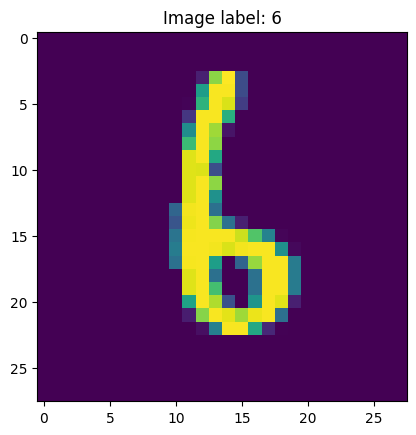

In [ ]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель, представленную ниже. Пожалуйста, не создавайте чрезмерно сложную сеть — она не должна быть глубже четырёх слоёв (можно и меньше). Ваша основная задача — обучить модель и добиться как минимум 92% точности на тестовой выборке (hold-out выборке).

*Примечание: линейных слоёв и функций активации должно быть достаточно.*

__Обратите внимание, ваша модель должна быть представлена переменной `model`__

In [ ]:

# класс для построения нейросети.
# Чтобы создать нейронную сеть в PyTorch, используется класс nn.Module.
# Чтобы им воспользоваться, необходимо наследование, что позволит использовать весь функционал базового класса nn.Module,
# но при этом еще имеется возможность переписать базовый класс для конструирования модели или прямого прохождения через сеть.
class mlp(nn.Module):
  def __init__(self):
    super().__init__() # функция создает объект базового класса
    # создаем полностью соединенные слои
    # Полностью соединенный слой нейронной сети представлен объектом nn.Linear, в котором первый аргумент — определение количества узлов в i-том слое, а второй — количество узлов в i+1 слое.
    self.fc1 = nn.Linear(28*28, 200)
    self.fc2 = nn.Linear(200, 200)
    self.fc3 = nn.Linear(200, 10)


  # После определения скелета архитектуры сети, необходимо задать принципы, по которым данные будут перемещаться по ней.
  # Это делается с помощью определяемого метода forward(),  который переписывает фиктивный метод в базовом классе и требует определения для каждой сети
  # Для метода forward() берем входные данные x в качестве основного аргумента.
  # Далее, загружаем всё в в первый полностью соединенный слой self.fc1(x) и применяем активационную функцию ReLU для узлов в этом слое, используя F.relu().
  # Из-за иерархической природы этой нейронной сети, заменяем x на каждой стадии и отправляем на следующий слой. Делаем эту процедуру на трех соединенных слоях, за исключением последнего.
  # На последнем слое возвращаем не ReLU, а логарифмическую softmax активационную функцию. Это, в комбинации с функцией потери отрицательного логарифмического правдоподобия, дает
  # многоклассовую на основе кросс-энтропии функцию потерь, которую мы будет использовать для тренировки сети.
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim=1)

model = mlp() # создание экземпляра (instance) этой архитектуры

Ниже доступны локальные тесты для проверки вашей модели:

In [ ]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print('Something is wrong with the model')
    raise e


assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Обучите модель на обучающей выборке. Рекомендуем поэкспериментировать с различными оптимизаторами.


In [ ]:
# your code here

# Далее необходимо задать метод оптимизации и критерий качества:
# # Осуществляем оптимизацию путем стохастического градиентного спуска
learning_rate = 0.01
epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
# создаём функцию потерь
criterion = nn.NLLLoss()
log_interval = 100

# запускаем главный тренировочный цикл
for epoch in range(epochs):
   for batch_idx, (data, target) in enumerate(train_data_loader):
       data, target = data, target

# изменим размер с (batch_size, 1, 28, 28) на (batch_size, 28*28)
       data = data.view(-1, 28*28)
       optimizer.zero_grad()
       net_out = model(data)
       loss = criterion(net_out, target)
       loss.backward()
       optimizer.step()
       if batch_idx % log_interval == 0:
           print(f"Epoch {epoch+1} [{batch_idx*len(data)}/{len(train_data_loader.dataset)}] "
      f"Loss: {loss.item():.6f}")

Epoch 1 [0/60000] Loss: 2.284314
Epoch 1 [3200/60000] Loss: 0.962919
Epoch 1 [6400/60000] Loss: 0.331532
Epoch 1 [9600/60000] Loss: 0.768535
Epoch 1 [12800/60000] Loss: 0.343119
Epoch 1 [16000/60000] Loss: 0.402709
Epoch 1 [19200/60000] Loss: 0.257761
Epoch 1 [22400/60000] Loss: 0.264786
Epoch 1 [25600/60000] Loss: 0.390902
Epoch 1 [28800/60000] Loss: 0.085976
Epoch 1 [32000/60000] Loss: 0.108729
Epoch 1 [35200/60000] Loss: 0.318544
Epoch 1 [38400/60000] Loss: 0.163669
Epoch 1 [41600/60000] Loss: 0.180163
Epoch 1 [44800/60000] Loss: 0.129583
Epoch 1 [48000/60000] Loss: 0.252280
Epoch 1 [51200/60000] Loss: 0.048322
Epoch 1 [54400/60000] Loss: 0.103879
Epoch 1 [57600/60000] Loss: 0.176202
Epoch 2 [0/60000] Loss: 0.061822
Epoch 2 [3200/60000] Loss: 0.141693
Epoch 2 [6400/60000] Loss: 0.129454
Epoch 2 [9600/60000] Loss: 0.100751
Epoch 2 [12800/60000] Loss: 0.066967
Epoch 2 [16000/60000] Loss: 0.054937
Epoch 2 [19200/60000] Loss: 0.055844
Epoch 2 [22400/60000] Loss: 0.305614
Epoch 2 [25600/

Также помните, что вы всегда можете обратиться к отличной [документации](https://pytorch.org/docs/stable/index.html) и [учебным материалам](https://pytorch.org/tutorials/).

Оценим качество классификации:

In [ ]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [ ]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.99775


In [ ]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [ ]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9813


Проверка, что пороги пройдены:

In [ ]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model`, а файл `hw_mnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [ ]:
import os
import json
import numpy as np
import torch
import torch.nn as nn

# ---- подготовка модели/окружения ----
# ВАЖНО: модель должна быть уже объявлена/загружена к этому моменту.
# Перенесём её на CPU и в eval-режим.
model = model.cpu()
model.eval()
torch.set_grad_enabled(False)

# ---- проверка данных ----
assert os.path.exists('hw_mnist_data_dict.npy'), \
    'Please, download `hw_mnist_data_dict.npy` and place it in the working directory'

# np.load может вернуть 0-мерный объект с dict или сразу dict
loaded_raw = np.load('hw_mnist_data_dict.npy', allow_pickle=True)
loaded_data_dict = loaded_raw.item() if not isinstance(loaded_raw, dict) else loaded_raw

def get_predictions(model: torch.nn.Module, eval_data_np: np.ndarray, step: int = 128) -> str:
    """
    Возвращает строку меток через запятую: '1,4,0,...'
    """
    # Преобразуем в тензор float32 на CPU
    eval_data = torch.as_tensor(eval_data_np, dtype=torch.float32, device='cpu')
    preds = []

    with torch.no_grad():
        # прогон батчами
        n = len(eval_data)
        for i in range(0, n, step):
            batch = eval_data[i:i+step].reshape(-1, 784)  # [B, 784]
            logits = model(batch)                        # [B, C]
            y_hat = logits.argmax(dim=1)                 # [B]
            preds.append(y_hat.cpu())

    labels = torch.cat(preds, dim=0).tolist()           # list[int]
    return ','.join(str(x) for x in labels)

submission_dict = {
    'train': get_predictions(model, loaded_data_dict['train']),
    'test':  get_predictions(model, loaded_data_dict['test']),
}

# ВАЖНО: имя файла — именно submission_dict.json
with open('submission_dict.json', 'w', encoding='utf-8') as f:
    json.dump(submission_dict, f, ensure_ascii=False)


### Сдача задания
Сдайте сгенерированный файл в соответствующую задачу в соревновании, а именно:
    
* `submission_dict_mnist_task_1.json` в задачу Warmup (hw_mnist)

На этом задание завершено. Поздравляем!